In [37]:
import numpy as np
import cv2
from skimage import io,transform
from scipy import ndimage

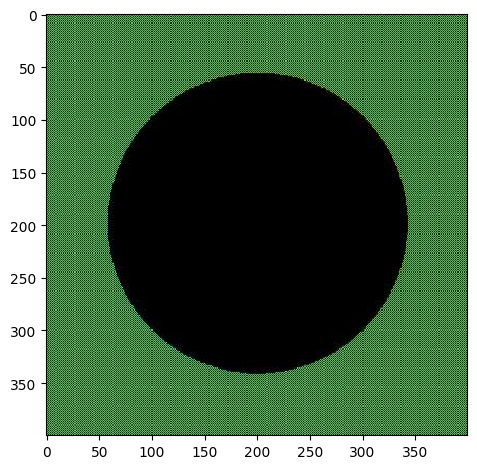

In [38]:
image = io.imread(r"./Bayer/circle.jpg")
io.imshow(image)

In [39]:
image = image[:,:,:3]
image = transform.resize(image, output_shape=(1024,1024,3))
image.shape

(1024, 1024, 3)

In [40]:
def color_filter(mask, shape):
    return np.dstack([np.tile(color_mask, np.asarray(shape) // len (color_mask)) for color_mask in mask])

In [41]:
bayer_mask = np.array([[[0, 1], [0, 0]],                   
                       [[1, 0], [0, 1]],                   
                       [[0, 0], [1, 0]]], dtype=np.uint8)  

bayer_mask.shape  

(3, 2, 2)

In [46]:
bayer_filter = color_filter(bayer_mask, shape = np.array([1024,1024]))


[[[0 1 0]
  [1 0 0]
  [0 1 0]
  ...
  [1 0 0]
  [0 1 0]
  [1 0 0]]

 [[0 0 1]
  [0 1 0]
  [0 0 1]
  ...
  [0 1 0]
  [0 0 1]
  [0 1 0]]

 [[0 1 0]
  [1 0 0]
  [0 1 0]
  ...
  [1 0 0]
  [0 1 0]
  [1 0 0]]

 ...

 [[0 0 1]
  [0 1 0]
  [0 0 1]
  ...
  [0 1 0]
  [0 0 1]
  [0 1 0]]

 [[0 1 0]
  [1 0 0]
  [0 1 0]
  ...
  [1 0 0]
  [0 1 0]
  [1 0 0]]

 [[0 0 1]
  [0 1 0]
  [0 0 1]
  ...
  [0 1 0]
  [0 0 1]
  [0 1 0]]]


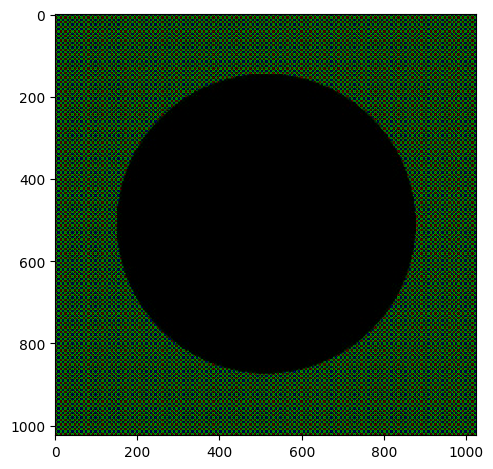

In [43]:
sensor_im = image * bayer_filter
io.imshow(sensor_im)

In [44]:
demosaicking_mask = np.dstack([
    np.ones([2, 2]),        
    0.5 * np.ones([2, 2]),  
    np.ones([2, 2]),        
])

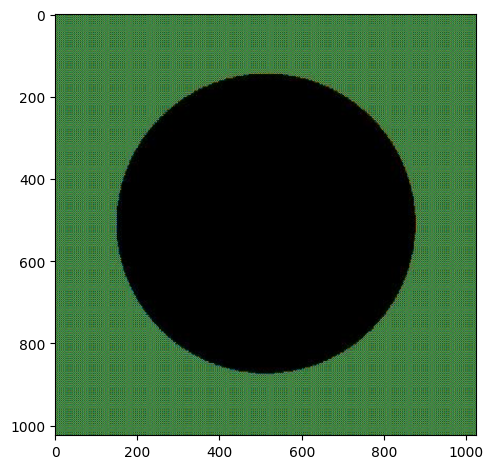

In [45]:
orignal_image = np.dstack([ndimage.convolve(sensor_im[:,:,channel], demosaicking_mask[:,:,channel], mode="constant", cval=0.0) for channel in range(3)])
io.imshow(orignal_image)